In [118]:
import pandas as pd
import numpy as np
import re
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import *
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import *
import plotly.express as px 
from collections import Counter

In [48]:
chat = pd.read_fwf("chat.txt")
chat.head()

,"[05/06/2020, 6:05:09 PM] ALC STUDENTS 2021: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp,",can read or listen to them.,Unnamed: 2
0,"[05/06/2020, 6:05:09 PM] Faith ALU: ‎Faith ALU...",NaN,NaN
1,"[13/01/2024, 8:42:17 PM] ALC STUDENTS 2021: ‎Y...",NaN,NaN
2,"[13/01/2024, 9:12:42 PM] Melissa: Any cab avai...",NaN,NaN
3,"[13/01/2024, 9:36:27 PM] Mbuthia Wa Kamau: i h...",NaN,NaN
4,"[13/01/2024, 9:36:49 PM] Mbuthia Wa Kamau: if ...",NaN,NaN


In [49]:
chat.columns

Index(['[05/06/2020, 6:05:09 PM] ALC STUDENTS 2021: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp,',
       'can read or listen to them.', 'Unnamed: 2'],
      dtype='object')

In [50]:
chat.shape

(6652, 3)

In [51]:
#Rename column:
chat.rename(columns={'[05/06/2020, 6:05:09 PM] ALC STUDENTS 2021: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp,': 'new_column'}, inplace=True)
chat.head()

,new_column,can read or listen to them.,Unnamed: 2
0,"[05/06/2020, 6:05:09 PM] Faith ALU: ‎Faith ALU...",NaN,NaN
1,"[13/01/2024, 8:42:17 PM] ALC STUDENTS 2021: ‎Y...",NaN,NaN
2,"[13/01/2024, 9:12:42 PM] Melissa: Any cab avai...",NaN,NaN
3,"[13/01/2024, 9:36:27 PM] Mbuthia Wa Kamau: i h...",NaN,NaN
4,"[13/01/2024, 9:36:49 PM] Mbuthia Wa Kamau: if ...",NaN,NaN


In [52]:
#drop unwanted column:
chat.drop(columns=['can read or listen to them.', 'Unnamed: 2'], inplace=True)
chat.head()

,new_column
0,"[05/06/2020, 6:05:09 PM] Faith ALU: ‎Faith ALU..."
1,"[13/01/2024, 8:42:17 PM] ALC STUDENTS 2021: ‎Y..."
2,"[13/01/2024, 9:12:42 PM] Melissa: Any cab avai..."
3,"[13/01/2024, 9:36:27 PM] Mbuthia Wa Kamau: i h..."
4,"[13/01/2024, 9:36:49 PM] Mbuthia Wa Kamau: if ..."


In [53]:
chat.shape

(6652, 1)

In [54]:
# Assuming 'chat' is your DataFrame and 'column_name' is the name of the column containing the chat data
chat_data = chat['new_column'].tolist()

# Define a function to parse the chat data
def parse_chat_data(chat_data):
    pattern = r'\[(.*),\s(.*\s(AM|PM))\]\s(.*):\s(.*)'
    matches = re.match(pattern, chat_data)
    if matches:
        return matches.groups()
    else:
        return None

# Apply the function to the chat data
parsed_data = [parse_chat_data(data) for data in chat_data]

# Create a new DataFrame
new_chat = pd.DataFrame(parsed_data, columns=['Date', 'Time', 'AM_PM', 'Sender', 'Message'])

# Print the new DataFrame
new_chat.head()

,Date,Time,AM_PM,Sender,Message
0,05/06/2020,6:05:09 PM,PM,Faith ALU,‎Faith ALU created this group
1,13/01/2024,8:42:17 PM,PM,ALC STUDENTS 2021,‎You joined using this group's invite link
2,13/01/2024,9:12:42 PM,PM,Melissa,Any cab available in gb ??
3,13/01/2024,9:36:27 PM,PM,Mbuthia Wa Kamau,i have 2 mpow babies left😄
4,13/01/2024,9:36:49 PM,PM,Mbuthia Wa Kamau,if you want to try them hmu


In [55]:
#Check number of senders
new_chat['Sender'].nunique()

170

## Visualizations
### 1. Most used words

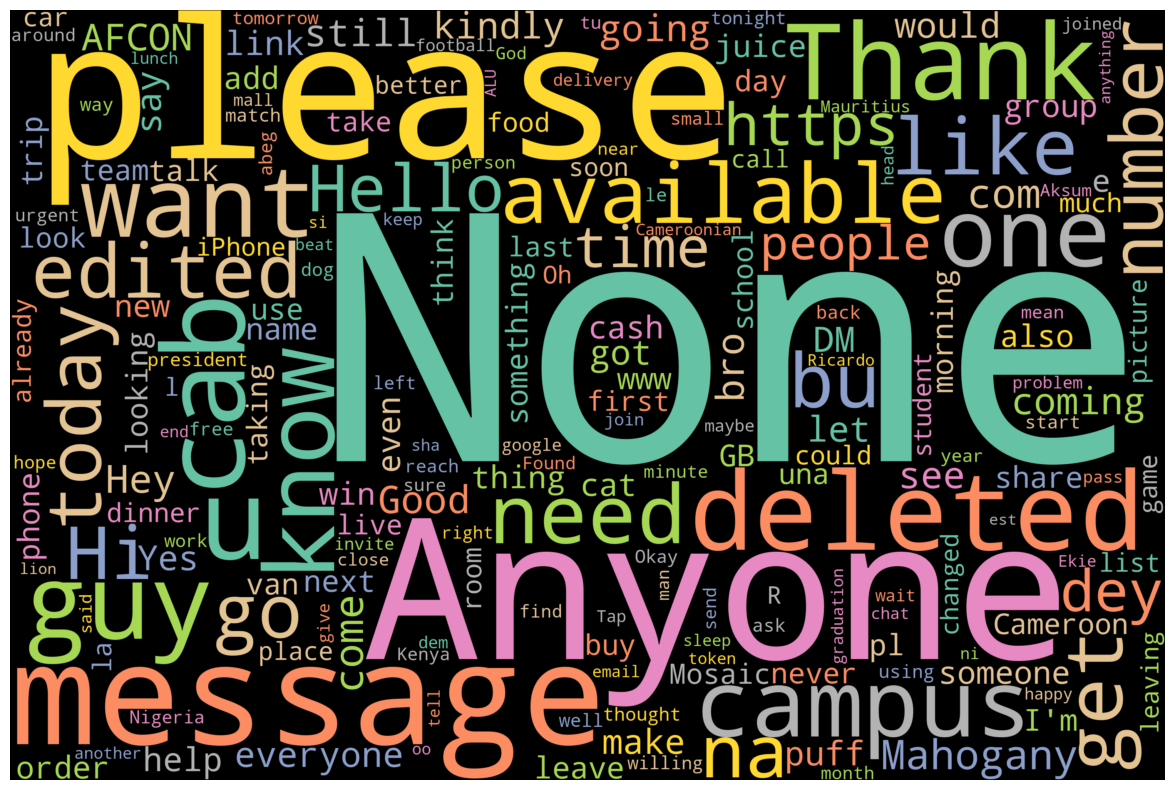

In [95]:
# Convert 'Message' column to string type and join all messages into a single string
text = ' '.join(new_chat['Message'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                     background_color='black', colormap='Set2', collocations=False,
                     stopwords=stop_words).generate(text)

# Display the generated image using matplotlib:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Noisiest Students

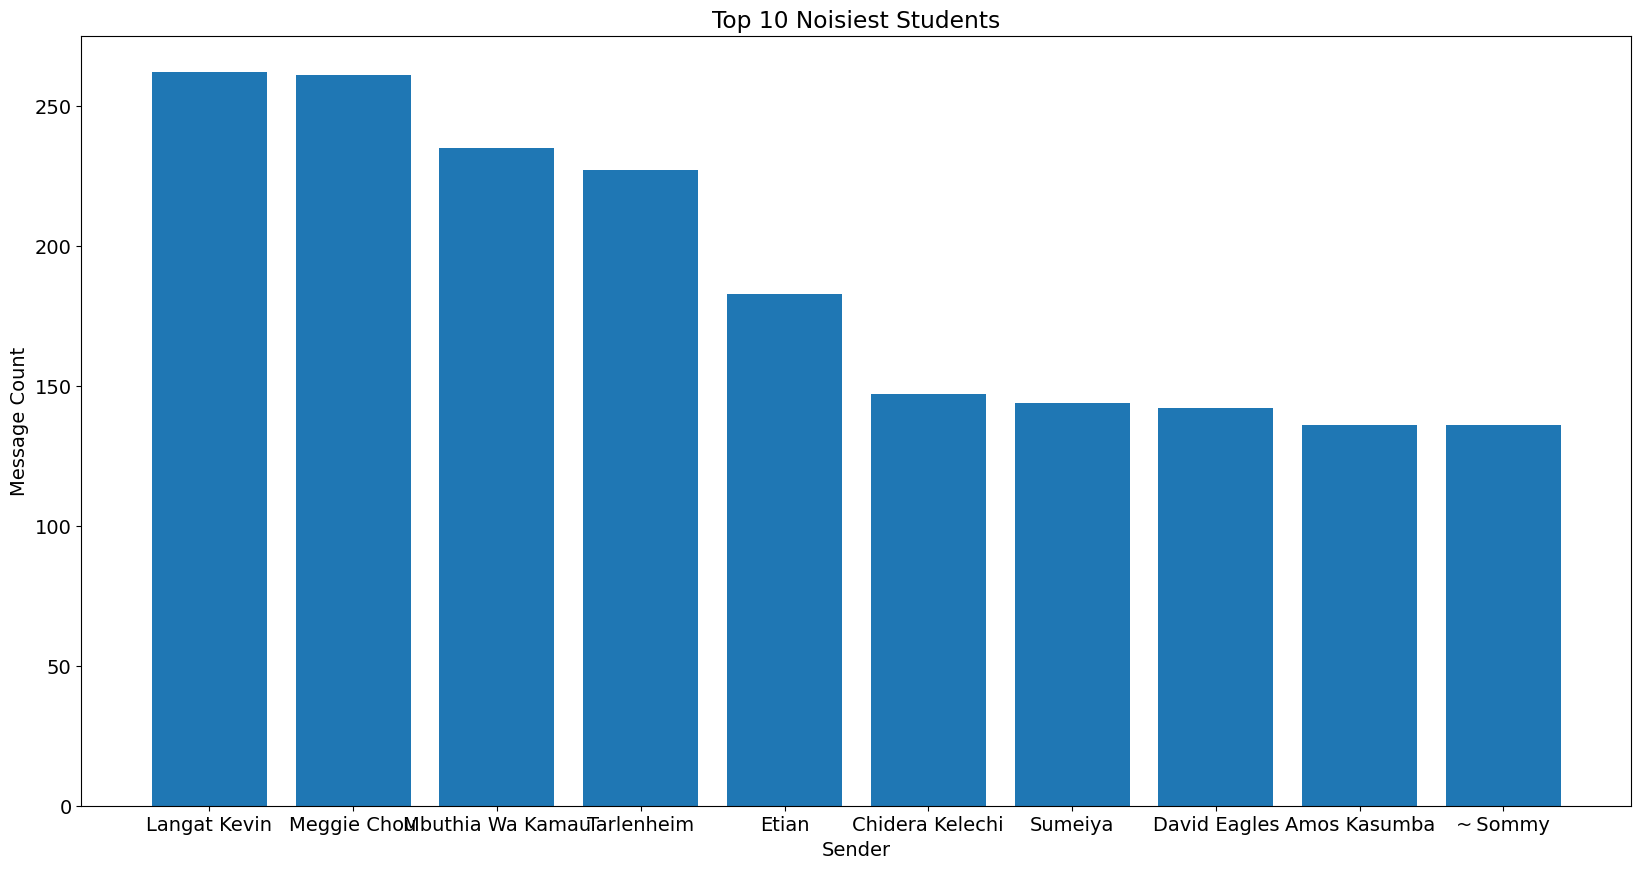

In [57]:
unique_senders = new_chat['Sender'].unique()
sender_counts = []
for sender in unique_senders:
    req_chat = new_chat[new_chat['Sender'] == sender]
    sender_counts.append(req_chat.shape[0])

# New dataframe for easy sorting
sender_data = pd.DataFrame({'Sender': unique_senders, 'Message Count': sender_counts})

# Sort the data
sender_data = sender_data.sort_values('Message Count', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(20, 10))
plt.bar(sender_data['Sender'], sender_data['Message Count'])
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.title('Top 10 Noisiest Students')
plt.show()
    


### 3. Time Series

In [58]:
# Calculate message counts per date
z = new_chat["Date"].value_counts()

# Create a new DataFrame for plotting (this is the main fix)
plot_data = pd.DataFrame({'Date': z.index, 'Msg_count': z.values})

# Create the line plot
fig = px.line(x=plot_data['Date'], y=plot_data['Msg_count']) 
fig.update_layout(title="Number of messages per date",
                  xaxis_title="Month",
                  yaxis_title="No of messages")
fig.update_xaxes(nticks=20)
fig.show()

### 4. Most Active Weekday 

In [65]:
new_chat['Date'] = pd.to_datetime(new_chat['Date'], format="%d/%m/%Y")
new_chat['Weekday'] = new_chat['Date'].dt.day_name()

message_frequency = new_chat['Weekday'].value_counts()

fig = px.line_polar(message_frequency, r=message_frequency.values, theta=message_frequency.index, line_close=True)
fig.update_traces(fill='toself')
fig.show()

### 5. AM/PM

In [144]:
ampm = px.histogram(new_chat, 
                    x='AM_PM', 
                    height=400,
                    width=600,
                    title='Distribution of Messages Sent in AM vs PM')
ampm.show()

### 6. Number of messages per hour

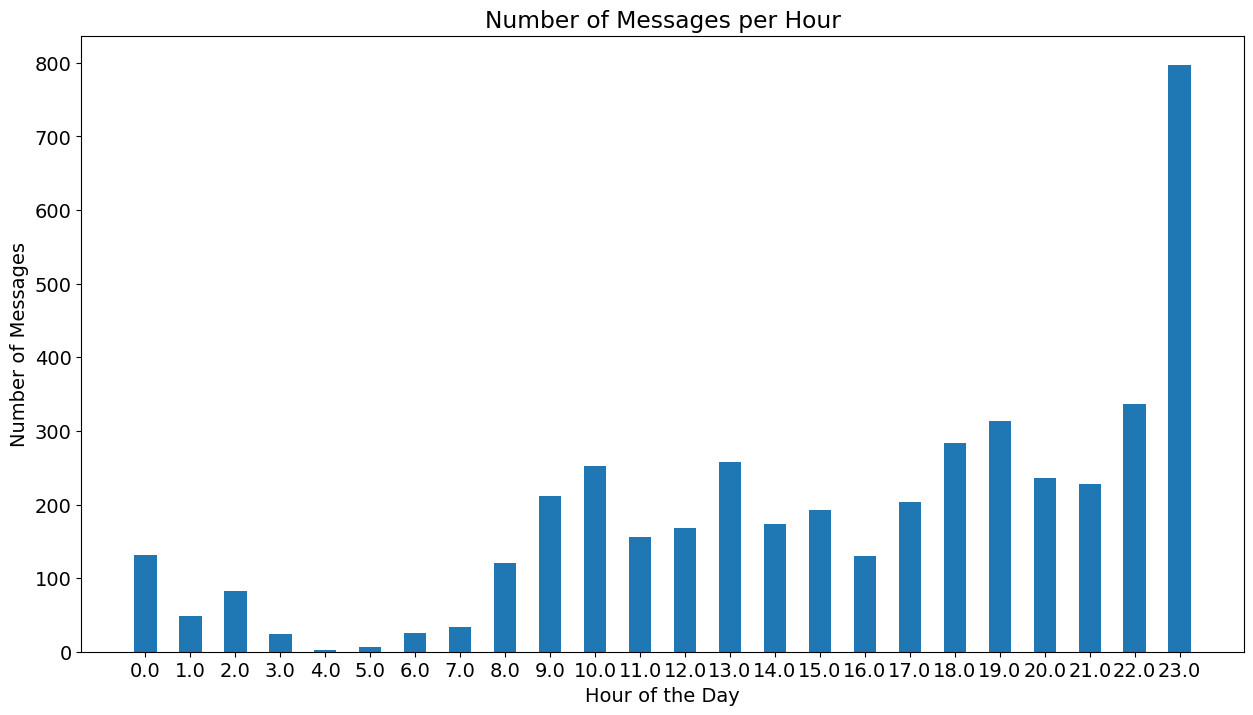

In [143]:
# Convert 'Time' column to datetime format
new_chat['Time'] = pd.to_datetime(new_chat['Time'])

# Extract hour from 'Time' column
new_chat['Hour'] = new_chat['Time'].dt.hour

# Group by 'Hour' and count the number of messages
hour_grouped_message = new_chat.groupby('Hour')['Message'].count()
hour_grouped_message = hour_grouped_message.reset_index()
hour_grouped_message.columns = ['Hour', 'Message Count']

plt.figure(figsize=(15, 8))

# Plot bar chart
plt.bar(hour_grouped_message["Hour"],
        height=hour_grouped_message["Message Count"],
        width=0.5,
        tick_label=hour_grouped_message["Hour"])

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per Hour')
plt.show()

### 7. Number of Words per Group Members

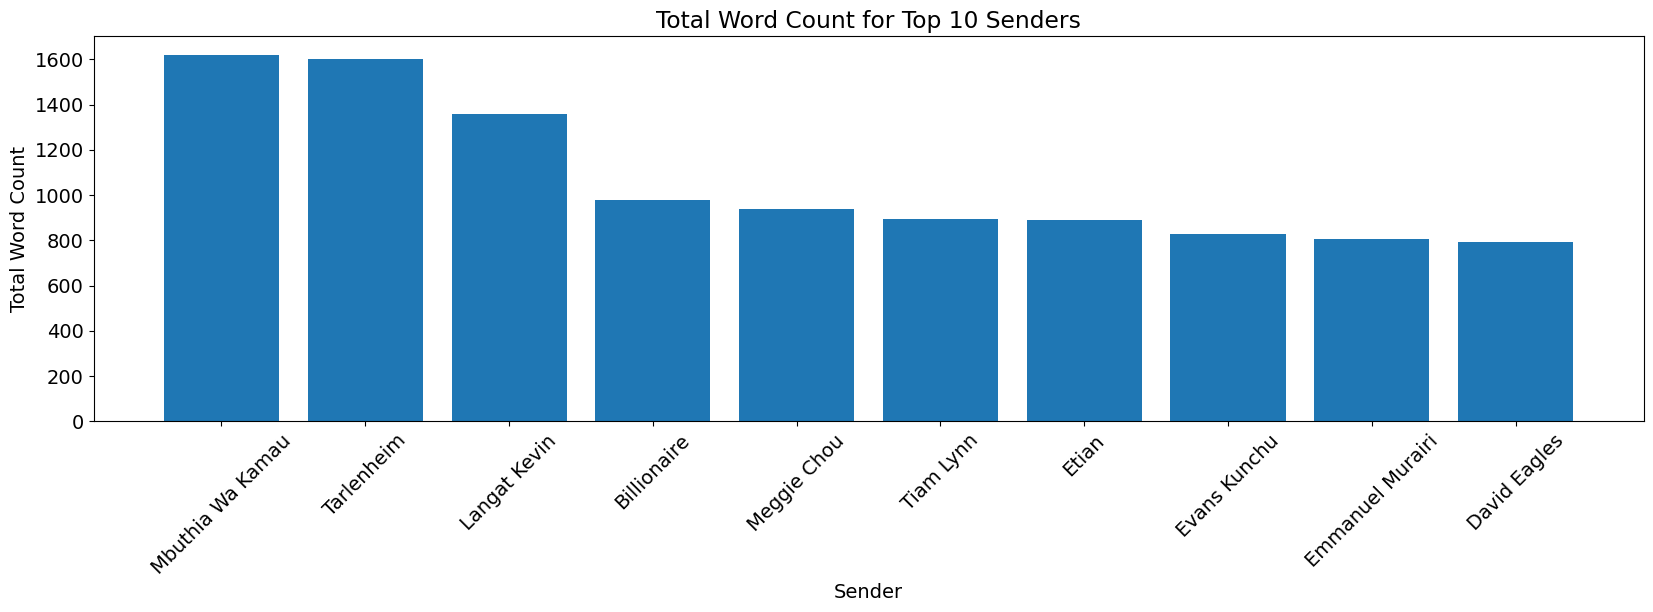

In [141]:
# Group by 'Sender' and calculate the total 'WordCount' for each sender
grouped_df = df.groupby('Sender')['WordCount'].sum().reset_index()

# Sort the DataFrame by 'WordCount' in descending order and reset the index
sorted_df = grouped_df.sort_values(by='WordCount', ascending=False).reset_index(drop=True)

# Filter the DataFrame to include only the top 10 senders
new_df = sorted_df.head(10)

# Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(new_df['Sender'], new_df['WordCount'])

# Add labels and title
plt.xlabel('Sender')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Top 10 Senders')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()
